<a href="https://colab.research.google.com/github/umeshbudhori/EDA--Telecom-Churn-Analysis/blob/main/EDA_Telecom_Churn_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription. Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.**

**This Notebook is Prepared with Hands on Efforts and Collaboration From our Team Including :**





1.   Rishabh Pandey
2.   Harshit Sachan
3.   ANKIT GUPTA
4.   UMESH CHANDRA







 

**Loading Data and Importing Modules**

In [ ]:
#importing the required packages
import pandas as pd
import numpy as np
#import visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
path ="/content/drive/My Drive/Telecom Churn.csv"

In [ ]:
telecom= pd.read_csv(path)

In [ ]:
 # To look the glimps of the data
telecom.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [ ]:
# to look the glimps of the data of bottom 5 rows
telecom.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [ ]:
# shape of dataset with rows and column
print(telecom.shape)

(3333, 20)


# Features of column of the Data:

**STATE:** 51 Unique States name

**Account Length:** Length of The Account

**Area Code:** Code Number of Area having some States

**International Plan :** Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan

**Voice Mail Plan:** Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan

**Number vmail messages:** Number of Voice Mail Messages ranging from 0 to 50

**Total day minutes:** Total Number of Minutes Spent in Morning

**Total day calls:** Total Number of Calls made in Morning.

**Total day charge:** Total Charge to the Customers in Morning.

**Total eve minutes:** Total Number of Minutes Spent in Evening

**Total eve calls:** Total Number of Calls made r in Evening.

**Total eve charge:** Total Charge to the Customers in Morning.

**Total night minutes:** Total Number of Minutes Spent in the Night.

**Total night calls:** Total Number of Calls made in Night.

**Total night charge:** Total Charge to the Customers in Night.

**Customer service calls:** Number of customer service calls made by customer

**Churn:** Customer Churn, True means churned customer, False means retained customer


In [ ]:
#the data types of all the columns
telecom.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [ ]:
#checking the details about the dataset
telecom.info()

## **There is 3333 entries and no null values are present**

In [ ]:
telecom['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

**Out of the total 3333 customers, 2850 customers are retained and the rest 483 are churning the telecom service.**

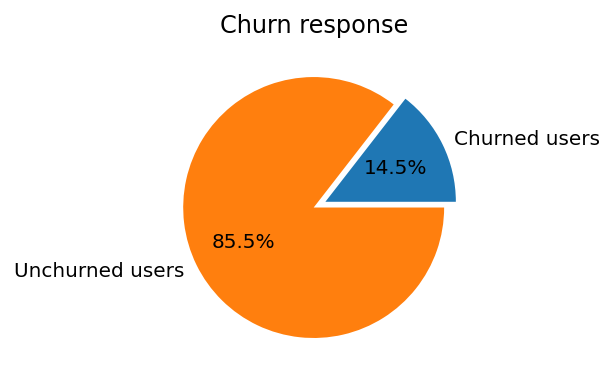

In [ ]:
Percent_churned_users = round((telecom['Churn'].mean() * 100),3)
Percent_unchurned_users = round((100 - Percent_churned_users),3)
x = [Percent_churned_users, Percent_unchurned_users]
labels = ['Churned users', 'Unchurned users']
explode = [0.1, 0]

fig, ax = plt.subplots(figsize=(4,3),dpi = 144)
ax.pie(x, labels = labels,explode = explode, autopct='%1.1f%%')
ax.set_title('Churn response')
plt.show()

From the table above, it can be seen that customers talk less during the day compared to the evening and night time.

The average number of calls during the day, evening and night is almost the same.

Apart from having a limited number of minutes to speak during the day, the costs incurred by the customer are higher compared to the evening and night talk minutes.

It can also be visualized in the structure shown below

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

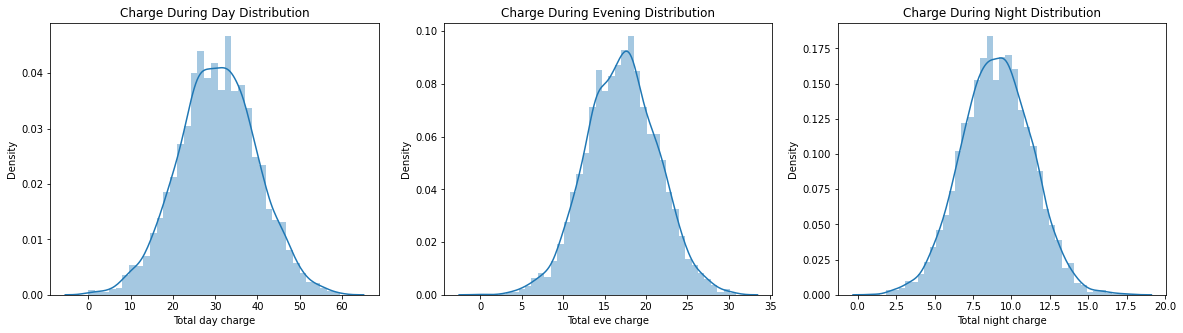

In [ ]:
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
plt.title('Charge During Day Distribution')
sns.distplot(telecom['Total day charge'])

plt.subplot(1,3,2)
plt.title('Charge During Evening Distribution')           
sns.distplot(telecom['Total eve charge'])


plt.subplot(1,3,3)
plt.title('Charge During Night Distribution')
sns.distplot(telecom['Total night charge'])
plt.show()

In [ ]:
# unique elements of the dataset
telecom.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [ ]:
# Checking Duplicate Values
len(telecom[telecom.duplicated()])

0

As of now There are 3333 rows and 20 columns in above dataset.

1 boolean data type i.e churn

8 float data type,

8integer data type,

3 object data type i.e categorical value are there.

There are no missing value present so no need to do the missing value imputation,
And also there are no duplicate value present.

In [10]:
#Printing the count of true and false in 'churn' feature#
print(telecom.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


In [11]:
#sorting the dataset
telecom.sort_values

<bound method DataFrame.sort_values of      State  Account length  ...  Customer service calls  Churn
0       KS             128  ...                       1  False
1       OH             107  ...                       1  False
2       NJ             137  ...                       0  False
3       OH              84  ...                       2  False
4       OK              75  ...                       3  False
...    ...             ...  ...                     ...    ...
3328    AZ             192  ...                       2  False
3329    WV              68  ...                       3  False
3330    RI              28  ...                       2  False
3331    CT             184  ...                       2  False
3332    TN              74  ...                       0  False

[3333 rows x 20 columns]>